# Plots with Plots

        "1.0 pic ≊ 1e3 words"

### Tom Breloff (@tbreloff)

breloff.com  
github.com/tbreloff

## I am a...

- Math Geek
    - BA Math/Economics (U. of Rochester)
    - MS Math (NYU's Courant Institute)
- Computer Geek
    - Since fourth grade... too many languages to list
- Finance Geek
    - Spent a decade building and operating quantitative trading desks
- AI Geek
    - Machine Learning, AGI, Neuroscience, Real-time Reinforcement Learning
  
... did I mention I'm a bit of a geek?

## Plots is...

- a user-facing API
- a wrapper of several other graphics packages
- a framework for describing visualizations
- serious convenience
- flexible and easy
- a tool to visualize EVERYTHING

## Plots is not...

- a LSTM generator of movie scripts
- a tool for supervillains
- a simulated farming game

# Words are boring! show me pictures!

## Ok then... Lets visualize the last 16 years of my life...

### If you want to follow along, then do:

In [ ]:
Pkg.add("Plots")
Pkg.add("PlotRecipes")
Pkg.add("PyPlot")

Pkg.checkout("Plots")
Pkg.checkout("PlotRecipes")

In [2]:
using Plots, PlotRecipes
pyplot()

Plots.PyPlotBackend()


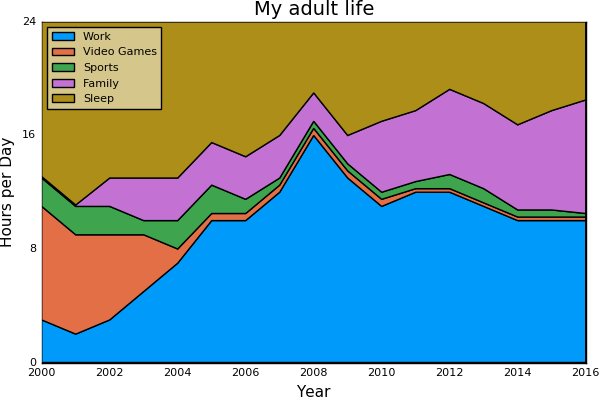

In [60]:
years = 2000:2016
activities = [
    ("Work",        [3,2,3,5,7,10,10,12,16,13,11,12,12,11,10,10,10]),
    ("Video Games", [8,7,6,4,1,.5,.5,.5,.5,.5,.5,.25,.25,.25,.25,.25,.25]),
    ("Sports",      [2,2,2,1,2,2,1,.5,.5,.5,.5,.5,1,1,.5,.5,.25]),
    ("Family",      [.1,.1,2,3,3,3,3,3,2,2,5,5,6,6,6,7,8]),
    ("Sleep",       zeros(17))
]
labels, hours = Plots.unzip(activities)
hours = hcat(hours...)
hours[:,5] = 24 - sum(hours,2)
pcts = hours ./ sum(hours,2)

portfoliocomposition(pcts, years, lab=labels', legend=:topleft, dir=:h)
plot!(xguide="Year", title="My adult life", bg=RGBA(1,1,1,0.5))
yaxis!("Hours per Day",(linspace(0,1,4),0:8:24))


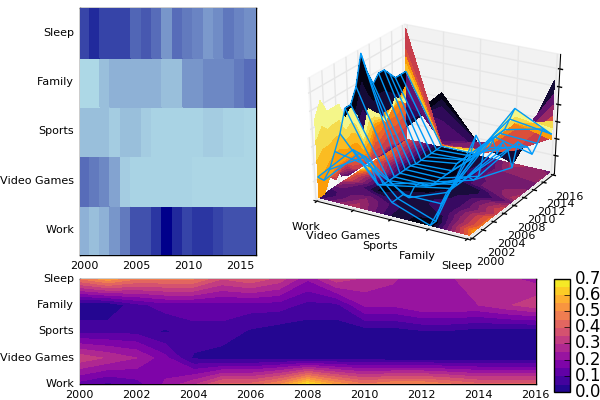

In [30]:
plot(
    heatmap(years, labels, pcts', leg=false, c=:blues),
    wireframe(labels, years, pcts, contours=true, leg=false, zticks=nothing),
    contour(years, labels, pcts', fill=true, c=:plasma),
    layout = @layout [a b{0.6w}; c{0.3h}]
)

### My path to Julia

In [31]:
languages = ["julia","c/c++","python","javascript","go","c#","java","matlab","other"]
pcts = [
    0 0 0 0 0 0 0.9 0 0.1
    0 0 0 0 0 0 0.9 0 0.1
    0 0 0 0 0 0 0.6 0 0.4
    0 0 0 0 0 0.2 0.5 0 0.3
    0 0.2 0 0 0 0.2 0.3 0 0.3
    0 0 1 0 0 0 0 0 0
    0 0.3 0.7 0 0 0 0 0 0
    0 0.6 0.4 0 0 0 0 0 0
    0 0.8 0.2 0 0 0 0 0 0
    0 0.7 0.3 0 0 0 0 0 0
    0 0.6 0.4 0 0 0 0 0 0
    0 0.6 0.4 0 0 0 0 0 0
    0 0.5 0.4 0.1 0 0 0 0 0
    0 0.15 0.15 0.15 0.15 0 0.15 0.15 0.1
    0.2 0 0.1 0 0 0 0.35 0.35 0
    0.9 0 0.1 0 0 0 0 0 0
    1 0 0 0 0 0 0 0 0
]
α = vcat(1, 0.3ones(8))';
anns = [
    (2002,   0.8, text("School",15,0.1pi)),
    (2007.5, 0.6, text("Banks", 15,0.1pi)),
    (2012.5, 0.4, text("Funds", 15,0.1pi)),
    (2015,   0.2, text("C Tech",15,0.1pi)),
];


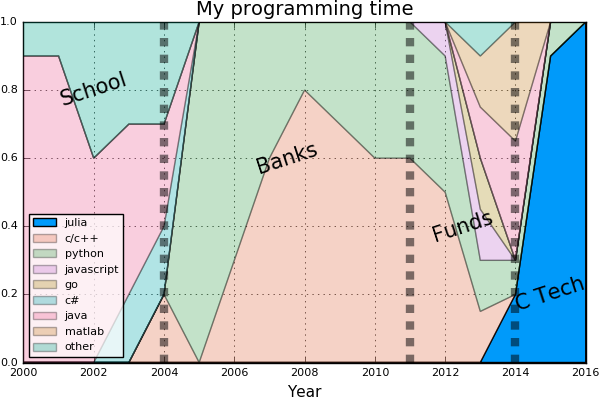

In [32]:
portfoliocomposition(pcts, years, lab=languages', dir=:h, α = α)
plot!(xguide="Year", title="My programming time", bg=RGBA(1,1,1,0.7))
vline!([2004, 2011, 2014], line=(:black,0.5,6,:dash), anns=anns, primary=false)

## Why Julia?

- It's easy to write fast code
- Multiple dispatch is powerful and intuitive
- Macros!
- Code just looks clean

## Why Plots?

"Powerful convenience"

#### A visualization library should:

- Accept any input format
- Provide smart defaults which adapt to your inputs
- Let you dynamically change visuals at any granularity
- Let you write both quick-one-liners and complex methods
- Be modular and flexible
- Give you tools to do EXACTLY what you want

... you know, just like Julia!

#### A visualization library should NOT:

- Force you to dedicate a computer monitor to documentation
- Impose a coding style on you
- Make you think too much
- Waste your precious time

## So... why Plots?

I didn't think we had a visualization library that fulfilled those requirements...

... so I started building.

## Plots Crash Course

- Basic commands
- Backends
- Output
- Attributes
- Series Types
- Layouts
- Recipes

### Basic commands


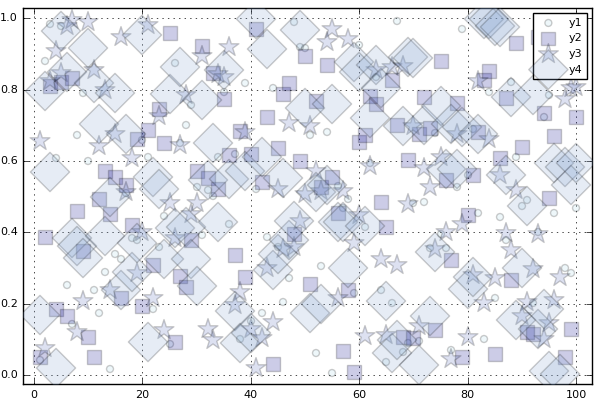

In [33]:
pyplot()
scatter(rand(100,4), palette = :blues, shape=:auto, markersize=(5:5:20)', alpha=0.2)

### Basic commands


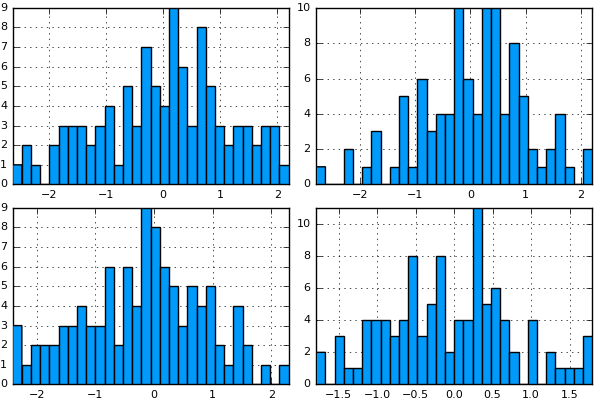

In [34]:
histogram(randn(100,4), layout=4, legend=false)

### Backends

In [51]:
unicodeplots()
plot(cumsum(randn(1000)))

       +------------------------------------------------------------+   
    16 |                                                           d| y1
       |                                                          ,"|   
       |...,.                                                 .,  | |   
       |]@Fl|                                                 |\ |P |   
       ||'`'l                                             .  ||]aW  |   
       |/   |.  .                  l                    d.],,/`|"/  |   
       |L____@__J__________________@____________________1O1@L1_____.|   
       |     |1."L.             W@]N                    | \ ||      |   
       |      \W F|            ,/ "|.                  |`   |`      |   
       |       /  l.           @    |                 .]            |   
       |       '  ||          .`    .                 //            |   
       |           |          /     l                .[             |   
       |           |     .    |     |       ..  ,  

## Output

- REPL:
    - `display` called when returned to the REPL
- IJulia:
    - Inline plot when returned to a cell
- To files (all equivalent):
    - `png("tmp")`
    - `png("tmp.png")`
    - `png(current(), "tmp")`
    - `savefig("tmp.png")`
    - `savefig(current(), "tmp.png")`
    - `writemime(open("tmp.png","w"), MIME("image/png"), current())`

## Attributes

- Aliases
- "Magic Args"
- Slicing and Dicing
- Cycling

### Aliases

Convenient shorthands and alternative names


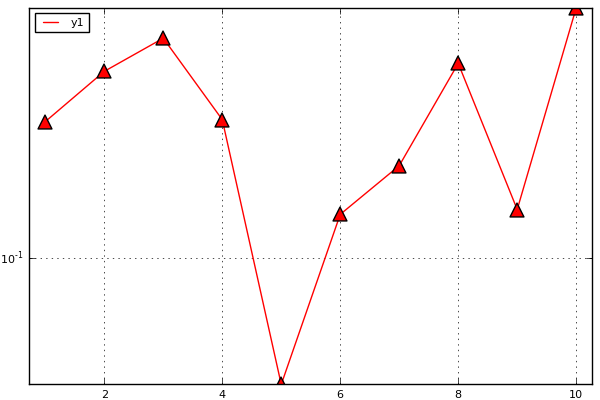

In [53]:
pyplot()
y = rand(10)

# equivalent:

plot(y, c = :red,           ms = 10,         shape = :^,               yscale = :log)
plot(y, seriescolor = :red, markersize = 10, markershape = :utriangle, yscale = :log10)

### "Magic Args"

Set related attributes all at once and let Plots guess what you want

- values can be in any order
- single values will be treated like a length-1 Tuple


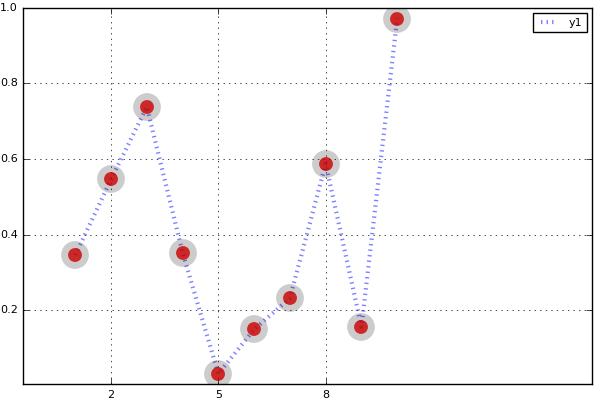

In [54]:
# equivalent:

plot(y, linewidth = 3, linealpha = 0.5, linecolor = :blue, linestyle = :dot,
        markersize = 10, markeralpha = 0.8, markercolor = :red,
        markerstrokewidth = 10, markerstrokecolor = :black, markerstrokealpha = 0.2,
        xlims = (0,15), xticks = 2:3:10)

plot(y, line = (3,0.5,:blue,:dot), marker = (10,0.8,:red,stroke(10,:black,.2)), xaxis = ((0,15),2:3:10))

### Slicing and Dicing

#### !!! This is very important... don't forget it !!!

In Plots, inputs are **sliced by columns** (with a few exceptions, like 3D surfaces).

A common mistake is to pass a N-length vector when you intend to "map" values.  Use a (1 x N) matrix instead.


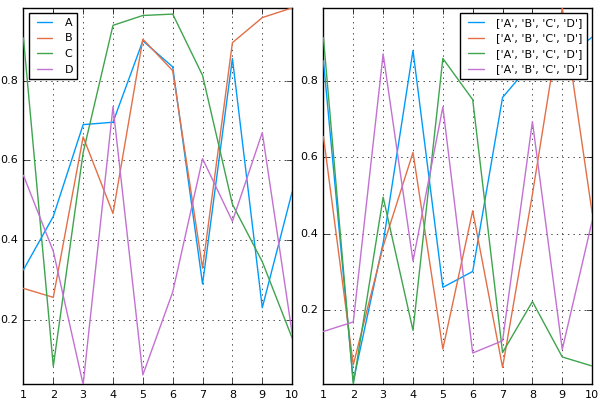

In [57]:
# Right
p1 = plot(rand(10,4), label = ["A" "B" "C" "D"])

# WRONG
p2 = plot(rand(10, 4), label = ["A","B","C","D"])

plot(p1, p2)

### Cycling

If there's not enough values, they are cycled, or repeated.


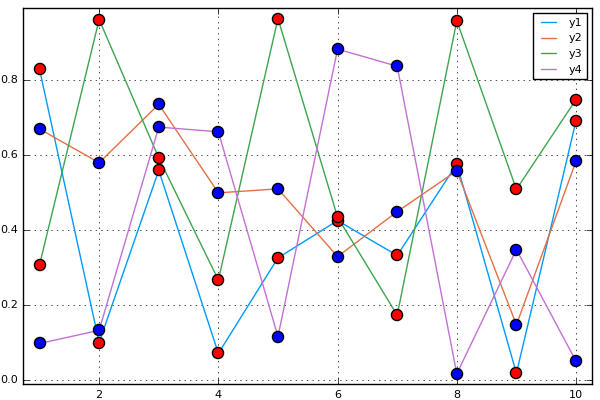

In [39]:
plot(rand(10,4), marker = (8, [:red :blue]))

### Series Types -- 2D


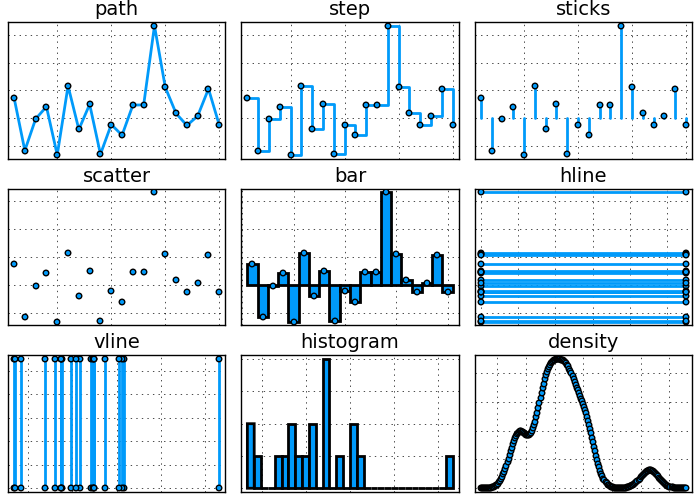

In [40]:
stypes = [:path, :step, :sticks, :scatter, :bar, :hline, :vline, :histogram, :density]
plot(randn(20,1), st = stypes, layout = length(stypes), w = 2, m = 4)
plot!(ticks=nothing, leg=false, title=stypes', size=(700,500))

### Series Types -- 3D

In [41]:
gr()
x = linspace(-5,5,50)
y = linspace(-3,10,30)
f(x,y) = sin(x) + x*cos(y)^2
sts = [:contour, :heatmap, :surface, :wireframe]
plot(x, y, f, st = sts, layout = length(sts))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 
 - 
 
 
 4 
 
 
 - 
 
 
 2 
 
 
 0 
 
 
 2 
 
 
 4 
 
 
 
 
 
 
<polyline clip-path="url(#clip02)" style="stroke:#821f6b; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 47.2441,146.892 50.7762,146.546 54.3082,146.291 57.8403,146.139 61.3723,146.098 64.9044,146.176 68.4364,146.372 71.9685,146.684 75.5006,147.102 79.0326,147.615 
 82.5647,148.202 86.0967,148.839 89.6288,149.496 93.1609,150.133 96.6929,150.706 97.7273,150.828 100.225,151.923 103.757,152.773 107.289,152.641 110.821,151.055 
 111.069,150.828 114.353,149.765 117.885,147.582 119.982,145.425 121.417,143.427 123.135,140.022 123.575,134.619 121.636,129.215 121.417,128.882 117.885,125.135 
 115.735,123.812 114.353,122.624 110.821,120.838 107.289,120.09 103.757,120.028 100.225,120.429 96.6929,121.139 93.1609,122.043 89.6288,123.05 87.0849,123.812 
 86.0967,123.973 82.5647,124.562 79.0326,125.104 75.5006,125.578 71.9685,125.965 68.4364,126.253 64.9044,126.434 61.3723,126.506 57.8403,126.469 54.3082,126.328 
 50.7762,126.092 47.2441,125.772 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#470b69; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 47.2441,128.597 50.7762,129.038 52.5259,129.215 54.3082,129.5 57.8403,129.928 61.3723,130.221 64.9044,130.374 68.4364,130.39 71.9685,130.278 75.5006,130.056 
 79.0326,129.75 82.5647,129.396 84.4267,129.215 86.0967,129.1 89.6288,128.903 93.1609,128.796 96.6929,128.84 100.225,129.118 100.831,129.215 103.757,130.007 
 107.289,131.699 110.821,134.5 110.931,134.619 110.821,135.078 109.331,140.022 107.289,141.171 103.757,142.449 100.225,143.158 96.6929,143.475 93.1609,143.526 
 89.6288,143.403 86.0967,143.179 82.5647,142.911 79.0326,142.643 75.5006,142.412 71.9685,142.244 68.4364,142.16 64.9044,142.172 61.3723,142.288 57.8403,142.509 
 54.3082,142.832 50.7762,143.25 47.2441,143.751 
 "/>
 
<polyline clip-path="url(#clip02)" style="stroke:#270b52; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 47.2441,130.413 50.7762,131.168 54.3082,131.819 57.8403,132.355 61.3723,132.766 64.9044,133.049 68.4364,133.21 71.9685,133.259 75.5006,133.218 79.0326,133.116 
 82.5647,132.994 86.0967,132.906 89.6288,132.919 93.1609,133.119 96.6929,133.618 100.225,134.561 100.368,134.619 100.225,134.841 96.6929,138.481 93.9203,140.022 
 93.1609,140.097 89.6288,140.249 86.0967,140.258 82.5647,140.192 79.0326,140.1 75.5006,140.023 75.3986,140.022 71.9685,139.867 69.1303,140.022 68.4364,140.029 
 64.9044,140.15 61.3723,140.364 57.8403,140.675 54.3082,141.08 50.7762,141.572 47.2441,142.142 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#63146e; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 47.2441,145.361 50.7762,144.928 54.3082,144.584 57.8403,144.343 61.3723,144.211 64.9044,144.194 68.4364,144.291 71.9685,144.497 75.5006,144.802 79.0326,145.187 
 80.9884,145.425 82.5647,145.62 86.0967,146.066 89.6288,146.5 93.1609,146.877 96.6929,147.139 100.225,147.214 103.757,147.004 107.289,146.377 110.084,145.425 
 110.821,145.12 114.353,142.826 117.035,140.022 117.863,134.619 114.353,129.508 114.061,129.215 110.821,127.396 107.289,126.248 103.757,125.669 100.225,125.475 
 96.6929,125.544 93.1609,125.786 89.6288,126.135 86.0967,126.536 82.5647,126.948 79.0326,127.337 75.5006,127.675 71.9685,127.943 68.4364,128.124 64.9044,128.209 
 61.3723,128.194 57.8403,128.078 54.3082,127.866 50.7762,127.565 47.2441,127.185 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#9e2a62; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 47.2441,124.36 50.7762,124.619 54.3082,124.79 57.8403,124.859 61.3723,124.818 64.9044,124.659 68.4364,124.382 71.9685,123.987 73.2362,123.812 75.5006,123.245 
 79.0326,122.205 82.5647,121.015 86.0967,119.706 89.4167,118.409 86.0967,115.588 82.9125,113.006 82.5647,112.929 79.0326,112.173 75.5006,111.512 71.9685,110.962 
 68.4364,110.533 64.9044,110.232 61.3723,110.061 57.8403,110.016 54.

## Layouts

- Simple
- Complex
- Inset/Floating

### Simple Layouts

`grid(numrows, numcols)`

- A single number computes a grid for that number of subplots.
- A 2-tuple maps to grid.
- Keyword arguments `widths` and `heights` accept vectors of percentages.


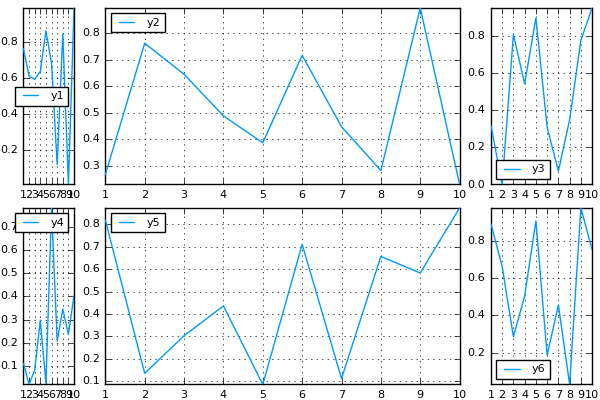

In [42]:
pyplot()
plot(rand(10,6), layout = grid(2, 3, widths=[0.1,0.7,0.2]))

### Complex Layouts with the `@layout` macro

From a nested array construction, create arbitrarily complex layouts with sizing and subplot names.

Sizing and alignment is relative to the "plot area", not the "subplot", so axes are lined up nicely.


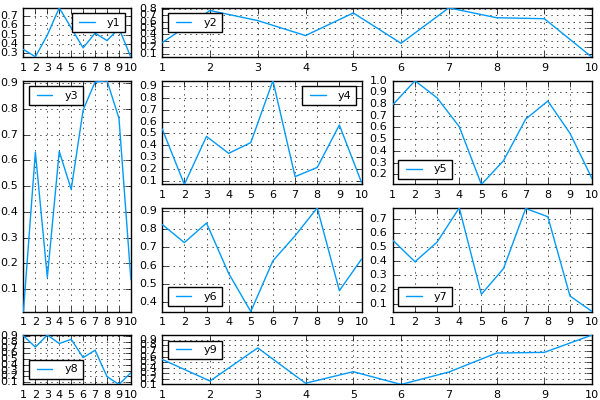

In [43]:
p = plot(rand(10,9), layout = @layout [
    a{0.2w} b
    c{0.7h} grid(2,2)
    d e
])

#### You can access the subplot by the name you gave it:


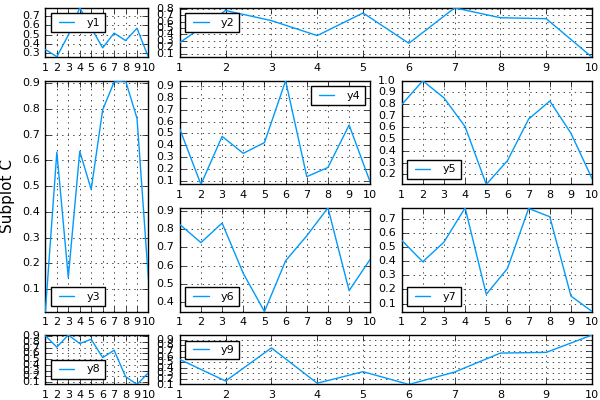

In [44]:
p.spmap[:c][:yaxis].d[:guide] = "Subplot C"; p

### Inset/Floating Subplots

Position using a bounding box of absolute and/or relative coordinates.

Values to pass to inset_subplots:

- bounding_box
- (subplot_index, bounding_box)
- [(subplot_index_1, bounding_box_1), ...]


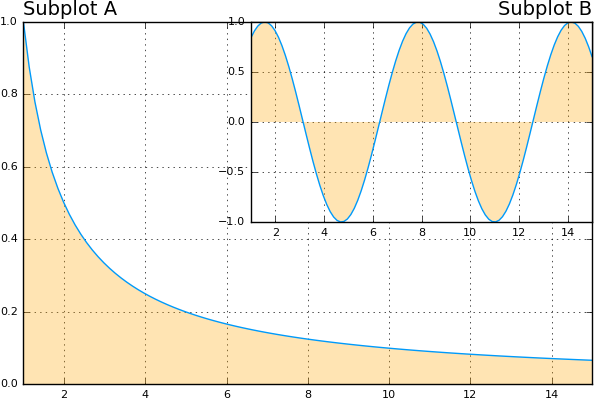

In [62]:
plot([x->1/x, sin], 1, 15, fill=(0, 0.3, :orange), leg=false,
    title = ["Subplot A" "Subplot B"], titleloc = [:left :right],
    inset = (1, bbox(0, 0, 0.6, 200px, :right)))

## Recipes

Transform data and attributes.

Users and package developers need only import RecipesBase.jl to define new recipes.

In [5]:
using Plots, PlotDocs
PlotDocs.pretty_print_expr(STDOUT, macroexpand(:(

@recipe function f(v::Float64, optional::Int = 10; key = :value)
    attr1 := 20
    attr2 --> :blue
    v
end

)))

function RecipesBase.apply_recipe(d::Dict{Symbol,Any},v::Float64,optional::Int=10; issubplot=false)
    if RecipesBase._debug_recipes[1]
        println("apply_recipe args: ",Any[:(v::Float64),:(optional::Int=10)])
    end
    begin 
        key = get!(d,:key,:value)
    end
    series_list = RecipesBase.RecipeData[]
    func_return = begin 
            d[:attr1] = 20
            get!(d,:attr2,:blue)
            v
        end
    if func_return != nothing
        push!(series_list,RecipesBase.RecipeData(d,RecipesBase.wrap_tuple(func_return)))
    end
    series_list
end



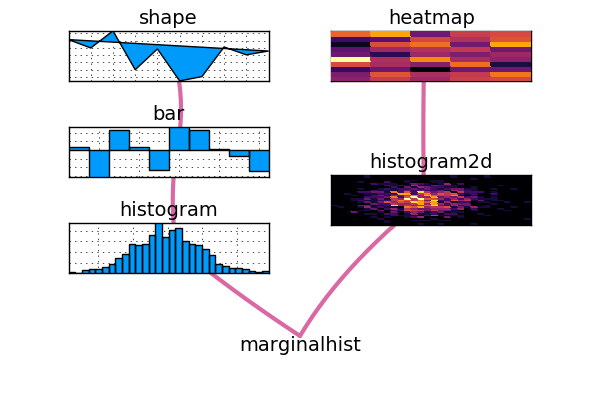

In [4]:
# build the nodes and adjacency matrix for the seriestype heirarchy
sts = [:shape, :bar, :histogram, :heatmap, :histogram2d, :marginalhist]
n = length(sts)
x, y = 0.45*[-1,-1,-1,1,1,0], [0,1,2,0,1.5,3]
totw, toth = 2, 4
adjmat = zeros(n,n)
for (i,j) in enumerate([2,3,6,5,6])
    adjmat[j,i] = 1
end

# create a graph of the adjacency matrix, where coordinates of the nodes are give by `func`
plt = graphplot(adjmat, func = _ -> (x,y,nothing), xlim=(-1,1), ylim=(-.5,3.5),
                ms=0, w=3, leg=false, yflip=true, curvature_scalar=0.1,
                ann=(0,3,text("marginalhist",:hcenter,:top)))

# sneakiness... add an inset subplot for the 5 recipes under marginalhist
args = Any[(randn(10),), (randn(10),), (randn(1000),), (randn(10,5),), (randn(1000),randn(1000))]
for (i,st) in enumerate(sts[1:n-1])
    xi, yi = (x[i]-(-1))/totw, (y[i]-(-0.5))/toth
    plot!(args[i]..., subplot=i+1, inset = (1, bbox(xi*w-100px, yi*h-25px, 200px, 50px)),
                ticks=nothing, st=st, leg=false, title=st)
end
plt

### User Recipes

When to use: custom visualization of user types

Notes: user recipes are processed early in the pipeline and can override dispatch of inputs.

Return the input arguments for future dispatch.

Example: Distributions


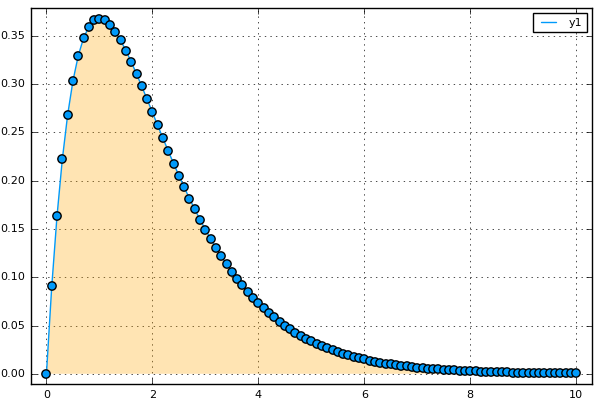

In [47]:
using Distributions
function default_range(dist::Distribution, n = 4)
    μ, σ = mean(dist), std(dist)
    linspace(μ - n*σ,μ + n*σ, 100)
end

@recipe function f(dist::Distribution, x = default_range(dist); func = pdf)
    delete!(d, :func)
    y = map(xi -> func(dist, xi), x)
    seriestype --> :path
    x, y
end

plot(Gamma(2), 0:0.1:10, fill=(0,0.3,:orange), m=:c)

## Type Recipes

When a data type is a drop-in replacement for something else.

Example: SymPy

In SymPy, massive functionality was enabled with **two lines of code**:

```
@recipe f{T<:Sym}(::Type{T}, v::T) = lambdify(v)
@recipe f{S<:AbstractVector{Sym}}(::Type{S}, ss::S) = Function[lambdify(s) for s in ss]
```


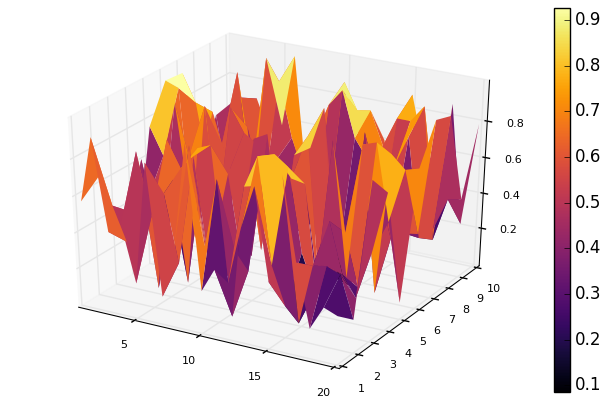

In [48]:
type MyWrapper; v; end
@recipe f(wrapper::MyWrapper) = wrapper.v

surface(MyWrapper(rand(10,20)))

### Plot Recipes

After user recipes and type recipes have been processed, but before the plot is built.

Build subplots/layouts.

Example: Marginal Histograms (from PlotRecipes.jl)


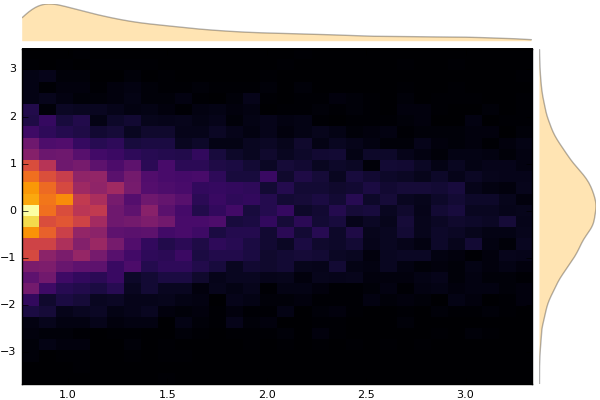

In [49]:
using PlotRecipes
n = 10000
marginalhist(1./(.3+rand(n)), randn(n), density=true, fill=(0,:orange), margin=1mm)

### Series Recipes

For a given series (such as a line or scatter plot), transform into series of composed of lower-level components.

Example: Box Plot

A boxplot is composed of shapes and scatters.  First grouped by x-value, then aggregated and summarized.


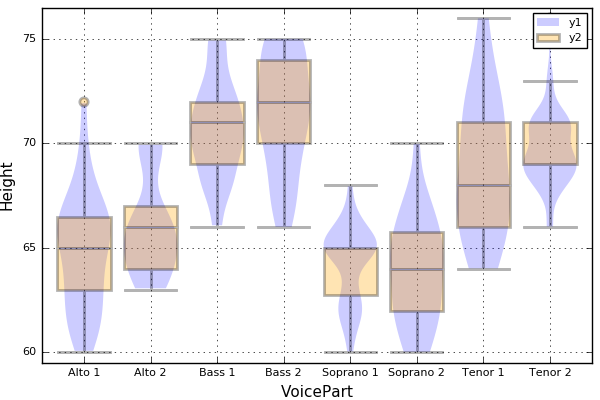

In [50]:
import RDatasets
singers = RDatasets.dataset("lattice","singer")
violin(singers,:VoicePart,:Height,marker=(0.2,:blue,stroke(0)))
boxplot!(singers,:VoicePart,:Height,marker=(0.3,:orange,stroke(2)))

## Break for live coding

## Future development

- Recipe flow should be robust for complex heirarchies
- Apply recipes during series updating (adding data points, etc)
- Performance optimizations (including time-to-first-plot)
- GLVisualize backend -- fast interactive 3D
- Create cool recipes!

## Thanks!

Find me:

- www.breloff.com
- github.com/tbreloff
- gitter.im/tbreloff

Other projects and organizations I'm involved with:

- JuliaPlots org
- tbreloff/OnlineAI.jl
- tbreloff/OpenAIGym.jl
- JuliaML org
- Evizero/LearnBase.jl
- joshday/OnlineStats.jl

Need a consultant, co-founder, or employee?  I'm open to exceptional opportunities.